In [94]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

In [95]:
X, Y = make_blobs(centers= 3, n_samples= 500, n_features= 2, shuffle= True, random_state=3119)




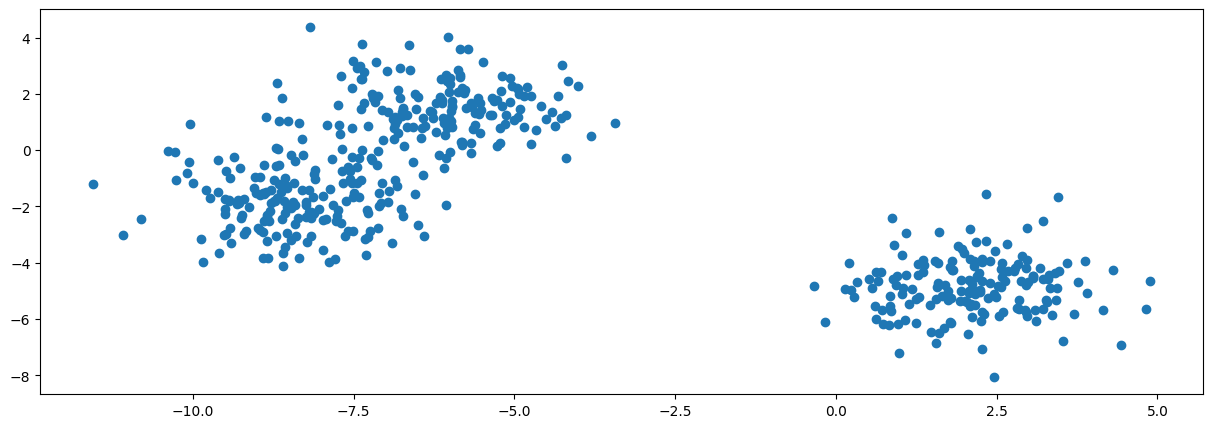

In [96]:

fig = plt.figure()

fig.set_figwidth(15)
fig.set_figheight(5)
plt.scatter(X[:, 0], X[:, 1])

plt.show()

In [97]:
def Euclidean_distance(X, Y):
    return np.sqrt(np.sum(np.square(X-Y)))

# A = np.array([3, 4])
# B = np.array([0, 0])

# print(Euclidean_distance(A,B))

In [118]:
class KMean:
    def __init__(self, K = 3, iterations = 100):
        self.K = K
        self.iterations = iterations 

        self.clusters = [[] for _ in range(self.K)]

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        

        #randomly intialize centroids
        centroid_indices = np.random.choice(self.n_samples, self.K, replace = False)
        #centroids =  X[centroid_indices]          #[self.X[centroid_idx] for centroid_idx in centroid_indices]
        centroids = [X[3], X[100], X[300]]

        #Calculate distance from all samples to all centroids 
        for _ in range(self.iterations):

            self.clusters = self._create_clusters(centroids)

            #compute new centroids 
            old_centroids = centroids
            centroids = self._update_centroids(self.clusters)
            converge = self._is_converge(centroids, old_centroids)

            if converge: 
                break

        return self._labels(self.clusters)


    def _create_clusters(self, centroids):
        #match samples to closest centroids

        clusters = [[] for _ in range(self.K)]

        for sample_idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)

            clusters[centroid_idx].append(sample_idx) 
        
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [Euclidean_distance(sample, centroid) for centroid in centroids]
        return np.argmin(distances)
                
    def _update_centroids(self, clusters):
        #calculate mean of cluster and assign it to centroid 
        centroids = np.zeros((self.K, self.n_features))

        for cls_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis = 0)
            centroids[cls_idx] = cluster_mean

        return centroids

    def _is_converge(self, centroids, old_centroids):
        distances = [Euclidean_distance(centroids[i], old_centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def _labels(self, clusters):
        labels = np.empty(self.n_samples)

        for cls_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cls_idx
        
        return labels


        

In [133]:
clf = KMean(3, 150)
labels1 = clf.predict(X)
print(labels1)

[1. 1. 0. 2. 1. 1. 2. 2. 1. 2. 2. 0. 1. 1. 2. 0. 2. 2. 2. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 0. 2. 0. 2. 0. 1. 1. 0. 2. 1. 0. 2. 1.
 2. 1. 1. 1. 2. 1. 0. 2. 0. 1. 0. 1. 2. 0. 2. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 2. 1. 2. 2. 2. 0. 1. 2. 2. 0. 1. 2. 0. 2. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 2. 0. 0. 2. 0. 1. 1. 0. 2. 2. 2. 1. 0. 0. 0. 0. 2.
 1. 1. 1. 2. 1. 0. 2. 0. 2. 1. 2. 1. 2. 1. 1. 1. 0. 2. 1. 0. 1. 0. 1. 0.
 0. 2. 0. 2. 1. 0. 0. 2. 2. 2. 0. 2. 2. 1. 0. 2. 1. 0. 2. 2. 1. 2. 2. 0.
 1. 0. 1. 1. 2. 2. 2. 1. 1. 1. 0. 2. 1. 0. 1. 0. 2. 2. 0. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 2. 0. 0. 0. 1. 1. 1. 0. 1. 2. 2. 1. 1. 1. 0. 1. 0. 2.
 2. 0. 2. 1. 2. 0. 0. 1. 2. 1. 2. 0. 1. 2. 1. 2. 0. 0. 1. 1. 1. 2. 2. 2.
 0. 1. 0. 2. 0. 1. 1. 2. 1. 2. 1. 0. 0. 0. 2. 2. 2. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 2. 1. 1. 0. 2. 0. 0. 1. 2. 1. 1. 1. 0. 2. 2. 2. 2. 0. 1. 0. 0.
 1. 1. 0. 0. 2. 0. 2. 1. 2. 2. 2. 1. 2. 2. 2. 0. 2. 2. 1. 1. 0. 1. 0. 1.
 0. 2. 0. 1. 0. 2. 0. 2. 2. 1. 2. 2. 1. 0. 0. 2. 0.